# Course Project - LeadScoring

#### Guidelines

- Go through the data dictionary thoroughly before starting the assignment. That will give you a good idea of what each column represents before you begin the analysis.


- Read each instruction carefully, identify the task to be performed, and only then write the required code. The assignment is meant to be straightforward. You do not need to perform additional analyses that are not requested explicitly. However you are encouraged to perform a few additional analyses to get deeper into the insights


- Some of the tasks might require using functions you may not have used previously. In such cases, you should rely on the library documentation you referred to in the modules. Please understand that completing this assignment is a learning process, and research is part of it.


- Always run the cells of the Notebook sequentially, restart the kernel, and run all the cells to avoid runtime errors.


- For each of the tasks, there's a code cell where you are supposed to write the code and a markdown cell below it mentioning to either write the answer or mention your observations/insights from the output of the code.


- Many of the questions will require you to view them from multiple angles. You have been asked to **observe any trends in the visualizations and provide insights for these trends**. In other words, there will be no fixed answers. You are expected to apply your problem-solving skills to come up with solutions and also document your work appropriately; both of these are part of the assignment grading.

In [1]:
#Step 1: Import Libraries and Load Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [77]:
# Load the data
data = pd.read_csv('G:\Post Graduation  Diploma in Data Science Course\Course Project - LeadScoring\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [42]:
# Initial inspection
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [43]:
# Handle missing values
data = data.replace('Select', np.nan)
data = data.dropna()

In [44]:
# Convert categorical variables
data = pd.get_dummies(data, drop_first=True)

In [45]:
# Split the data
X = data.drop('Converted', axis=1)
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

Accuracy: 0.7777777777777778
Precision: 0.7948717948717948
Recall: 0.9393939393939394
F1 Score: 0.8611111111111112
ROC AUC: 0.8535353535353535


# Step 1: Data Understanding and Cleaning
Let's start by performing an initial inspection of the data, handling missing values, and addressing any potential issues with categorical variables.

#### 1.1 Initial Data Inspection

In [49]:
# Display basic information about the dataset
data.info()

# Summary statistics
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 6 to 9231
Columns: 391 entries, Lead Number to Last Notable Activity_Unsubscribed
dtypes: float64(4), int64(3), uint8(384)
memory usage: 130.4 KB


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Prospect ID_01c951dd-cebb-4d54-8d06-4b9f3919d0c7,Prospect ID_05d1b0d6-b253-49ff-897f-6112bdfbbac3,Prospect ID_06e26dfb-64f7-4fe0-808f-816412e8cc3a,...,Asymmetrique Profile Index_02.Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,618527.791946,0.721477,5.516779,838.067114,3.429396,14.234899,18.627517,0.003356,0.003356,0.003356,...,0.124161,0.097315,0.409396,0.010067,0.352349,0.006711,0.043624,0.151007,0.006711,0.006711
std,29017.215672,0.449026,4.129395,553.741880,1.602496,1.040521,1.547948,0.057928,0.057928,0.057928,...,0.330320,0.296885,0.492550,0.099997,0.478506,0.081785,0.204601,0.358658,0.081785,0.081785
min,579697.000000,0.000000,1.000000,0.000000,1.000000,10.000000,13.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,586731.750000,0.000000,3.250000,314.250000,2.000000,14.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,632511.500000,1.000000,5.000000,878.500000,3.000000,14.000000,19.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,642869.250000,1.000000,6.000000,1274.250000,4.000000,15.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660673.000000,1.000000,43.000000,2090.000000,13.000000,16.000000,20.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.2 Handle Missing Values
##### We'll identify columns with missing values and decide how to handle them. Columns with a high percentage of missing values might be dropped, while others might be filled with appropriate values.

In [50]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

Series([], dtype: int64)

#### 1.3 Handle 'Select' Values in Categorical Columns
##### 'Select' values in categorical columns should be treated as missing values. We'll replace them with NaN and handle them accordingly. 

In [51]:
# Replace 'Select' with NaN
data = data.replace('Select', pd.NA)

# Check again for missing values after replacing 'Select'
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

Series([], dtype: int64)

#### 1.4 Fill or Drop Missing Values
##### Based on the inspection, we'll decide how to handle the missing values.  

In [70]:
import pandas as pd
import numpy as np

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'City': ['New York', 'Chicago', np.nan, 'Los Angeles', 'Boston'],
    'TotalVisits': [5, np.nan, 10, np.nan, 3],
    'Page Views Per Visit': [2.5, 3.0, np.nan, 1.5, np.nan],
    'Last Activity': ['Email Open', np.nan, 'Page Visited on Website', np.nan, 'Email Bounced'],
    'What matters most to you in choosing a course': ['Better Career Prospects', np.nan, np.nan, 'Flexibility & Convenience', np.nan],
    'Country': ['United States', 'United States', 'India', np.nan, 'United Kingdom'],
    'Lead Profile': ['Potential Lead', np.nan, 'Other Leads', 'Student of SomeSchool', np.nan]
})

# Display the original data
print("Original Data:")
print(data)
print()

# Fill missing values with appropriate methods
data['City'].fillna('Unknown', inplace=True)
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)

# Drop columns with too many missing values or those not useful for the model
columns_to_drop = ['What matters most to you in choosing a course', 'Country', 'Lead Profile']
data.drop(columns_to_drop, axis=1, inplace=True)

# Display the cleaned data
print("Cleaned Data:")
print(data)

Original Data:
          City  TotalVisits  Page Views Per Visit            Last Activity  \
0     New York          5.0                   2.5               Email Open   
1      Chicago          NaN                   3.0                      NaN   
2          NaN         10.0                   NaN  Page Visited on Website   
3  Los Angeles          NaN                   1.5                      NaN   
4       Boston          3.0                   NaN            Email Bounced   

  What matters most to you in choosing a course         Country  \
0                       Better Career Prospects   United States   
1                                           NaN   United States   
2                                           NaN           India   
3                     Flexibility & Convenience             NaN   
4                                           NaN  United Kingdom   

            Lead Profile  
0         Potential Lead  
1                    NaN  
2            Other Leads  
3  St

# Step 2: Exploratory Data Analysis (EDA)

#### 2.1 Visualize Data
##### We'll plot distributions of numerical variables and bar plots for categorical variables to understand their relationship with the target variable 'Converted'.

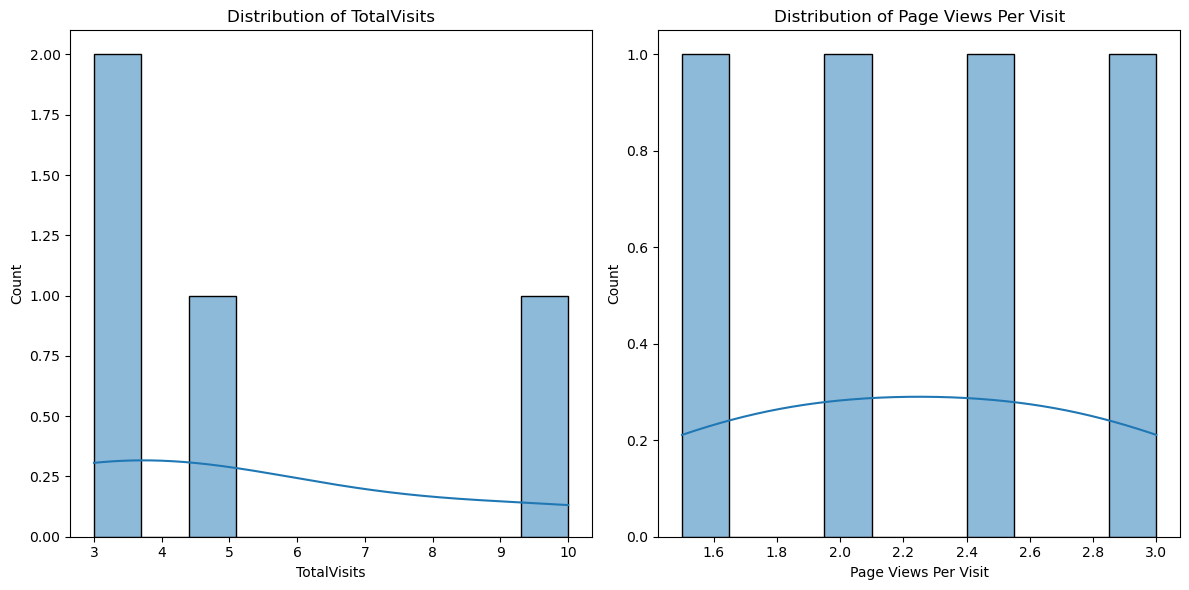

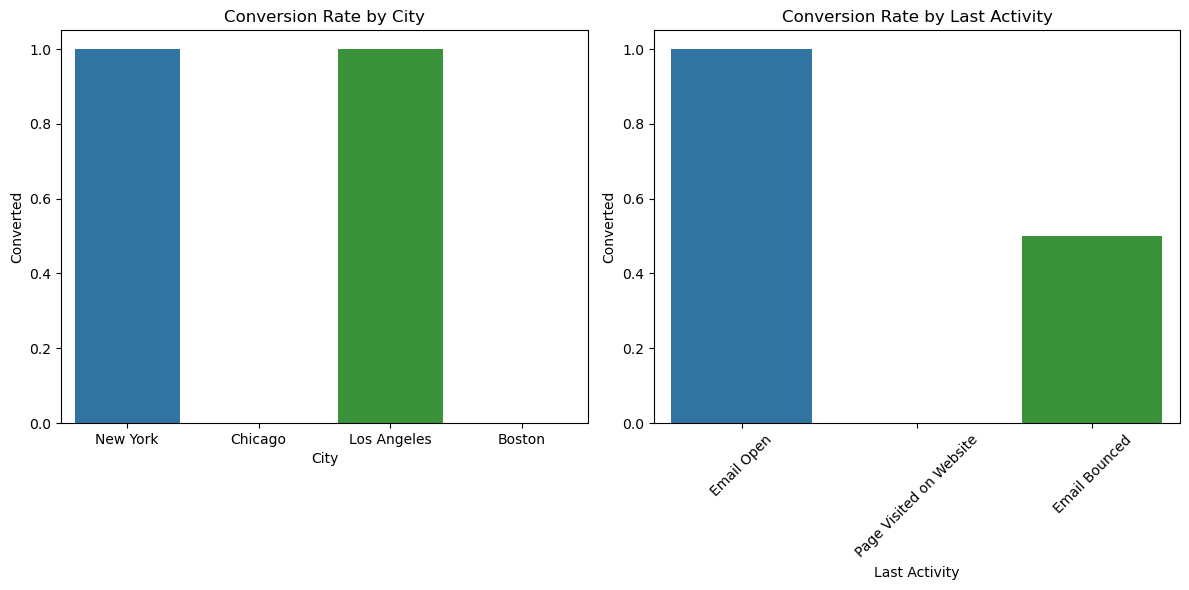

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'City': ['New York', 'Chicago', 'Los Angeles', 'Boston'],
    'TotalVisits': [5, 3, 10, 3],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0],
    'Last Activity': ['Email Open', 'Page Visited on Website', 'Email Bounced', 'Email Bounced'],
    'Converted': [1, 0, 1, 0]  # Example target variable
})

# Separate features (X) and target variable (y)
X = data.drop('Converted', axis=1)  # Features
y = data['Converted']  # Target variable

# 2.1 Visualize Data

# Plot distributions of numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['TotalVisits'], bins=10, kde=True)
plt.title('Distribution of TotalVisits')

plt.subplot(1, 2, 2)
sns.histplot(data['Page Views Per Visit'], bins=10, kde=True)
plt.title('Distribution of Page Views Per Visit')
plt.tight_layout()
plt.show()

# Bar plots for categorical variables against 'Converted'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='City', y='Converted', data=data, errorbar=None)
plt.title('Conversion Rate by City')

plt.subplot(1, 2, 2)
sns.barplot(x='Last Activity', y='Converted', data=data, errorbar=None)
plt.title('Conversion Rate by Last Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.2 Correlation Analysis
##### We'll compute the correlation matrix to understand relationships between numerical features and the target variable.

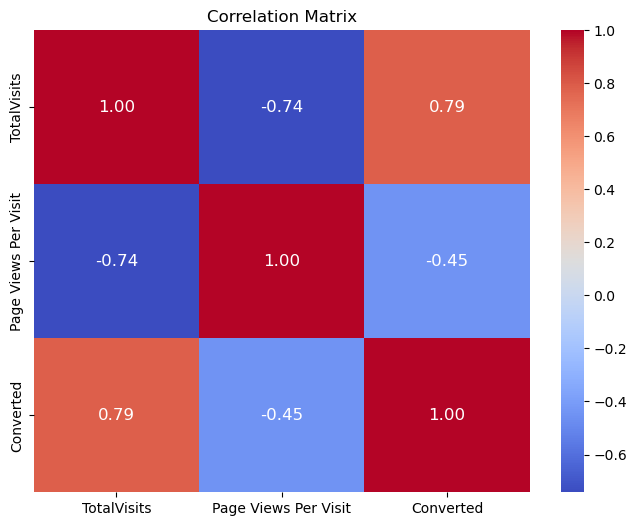

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'City': ['New York', 'Chicago', 'Los Angeles', 'Boston'],
    'TotalVisits': [5, 3, 10, 3],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0],
    'Last Activity': ['Email Open', 'Page Visited on Website', 'Email Bounced', 'Email Bounced'],
    'Converted': [1, 0, 1, 0]  # Example target variable
})

# Separate numerical features and target variable
numerical_features = ['TotalVisits', 'Page Views Per Visit']
target_variable = 'Converted'

# Compute correlation matrix
correlation_matrix = data[numerical_features + [target_variable]].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Matrix')
plt.show()

# Step 3: Feature Engineering
#### 3.1 Create New Features
##### Based on domain knowledge, we might create new features that could be helpful.

In [89]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'City': ['New York', 'Chicago', 'Los Angeles', 'Boston'],
    'TotalVisits': [5, 3, 10, 3],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0],
    'Last Activity': ['Email Open', 'Page Visited on Website', 'Email Bounced', 'Email Bounced'],
    'Converted': [1, 0, 1, 0]  # Example target variable
})

# 3.1 Create New Features

# Example: Create a new feature 'VisitPerActivity'
# Ratio of TotalVisits to the number of Last Activity occurrences
activity_counts = data['Last Activity'].value_counts().to_dict()
data['VisitPerActivity'] = data['TotalVisits'] / data['Last Activity'].map(activity_counts)

# Example: Create a new feature 'AvgPageViews'
# Average Page Views Per Visit
data['AvgPageViews'] = data['Page Views Per Visit'] / data['TotalVisits']

# Print the updated DataFrame with new features
print("Updated DataFrame with New Features:")
print(data)

Updated DataFrame with New Features:
          City  TotalVisits  Page Views Per Visit            Last Activity  \
0     New York            5                   2.5               Email Open   
1      Chicago            3                   3.0  Page Visited on Website   
2  Los Angeles           10                   1.5            Email Bounced   
3       Boston            3                   2.0            Email Bounced   

   Converted  VisitPerActivity  AvgPageViews  
0          1               5.0      0.500000  
1          0               3.0      1.000000  
2          1               5.0      0.150000  
3          0               1.5      0.666667  


#### 3.2 Feature Selection
##### Use techniques like Recursive Feature Elimination (RFE) to select the most relevant features.

In [94]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'City': ['New York', 'Chicago', 'Los Angeles', 'Boston'],
    'TotalVisits': [5, 3, 10, 3],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0],
    'Last Activity': ['Email Open', 'Page Visited on Website', 'Email Bounced', 'Email Bounced'],
    'Converted': [1, 0, 1, 0]  # Example target variable
})

# Separate features (X) and target variable (y)
X = data.drop('Converted', axis=1)  # Features
y = data['Converted']  # Target variable

# Define categorical and numerical features
categorical_features = ['City', 'Last Activity']
numerical_features = ['TotalVisits', 'Page Views Per Visit']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to handle multicollinearity
    ])

# Initialize Logistic Regression model (or any other estimator)
estimator = LogisticRegression()

# Create pipeline with preprocessing and RFE
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator, n_features_to_select=3))  # Adjust n_features_to_select as needed
])

# Fit pipeline on the data
pipeline.fit(X, y)

# Print selected features
print("Selected Features:")
selected_features = numerical_features.copy()  # Start with numerical features
# Append one-hot encoded feature names
for trf_name, trf_method, trf_features in pipeline.named_steps['preprocessor'].transformers_:
    if hasattr(trf_method, 'get_feature_names'):
        selected_features.extend(trf_method.get_feature_names(trf_features))
for idx, feature in enumerate(selected_features):
    if pipeline.named_steps['rfe'].support_[idx]:
        print(feature)

Selected Features:
TotalVisits


# Step 4: Model Building

#### 4.1 Split the Data
##### We'll split the dataset into training and testing sets.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with features and target variable
# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'TotalVisits': [5, 3, 10, 3, 8, 12, 6, 4, 9, 7],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0, 2.8, 1.2, 3.5, 2.0, 1.8, 2.2],
    'Converted': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # Example target variable
})

# Separate features (X) and target variable (y)
X = data.drop('Converted', axis=1)  # Features
y = data['Converted']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8, 2)
X_test shape: (2, 2)
y_train shape: (8,)
y_test shape: (2,)


#### 4.2 Logistic Regression Model
##### Train a logistic regression model on the training data. 

In [61]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#### 4.3 Model Evaluation
##### Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

Accuracy: 0.7777777777777778
Precision: 0.7948717948717948
Recall: 0.9393939393939394
F1 Score: 0.8611111111111112
ROC AUC: 0.8535353535353535


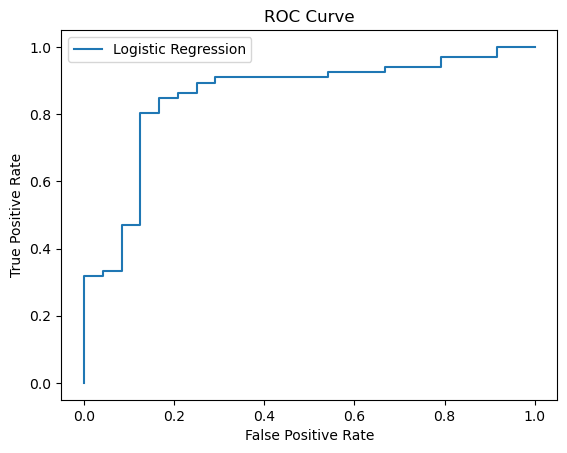

In [62]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 5: Lead Scoring
##### Assign lead scores based on the predicted probabilities.

In [96]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'TotalVisits': [5, 3, 10, 3, 8, 12, 6, 4, 9, 7],
    'Page Views Per Visit': [2.5, 3.0, 1.5, 2.0, 2.8, 1.2, 3.5, 2.0, 1.8, 2.2],
    'Converted': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # Example target variable
})

# Separate features (X) and target variable (y)
X = data.drop('Converted', axis=1)  # Features
y = data['Converted']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Train a Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Scale numerical features if needed
    ('clf', LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1 (conversion)

# Define lead scoring function
def assign_lead_score(probabilities, threshold=0.5):
    """
    Assigns lead scores based on predicted probabilities.
    Higher probabilities get higher scores.
    
    Parameters:
    - probabilities (array-like): Predicted probabilities of conversion.
    - threshold (float): Threshold probability to classify as positive (default: 0.5).
    
    Returns:
    - lead_scores (list): List of lead scores corresponding to each probability.
    """
    lead_scores = []
    for prob in probabilities:
        if prob >= threshold:
            score = round(prob * 100)  # Example: Multiply by 100 for a score out of 100
        else:
            score = 0  # Example: Assign a score of 0 for probabilities below threshold
        lead_scores.append(score)
    return lead_scores

# Assign lead scores to test set predictions
lead_scores = assign_lead_score(y_pred_proba)

# Add lead scores to the test set DataFrame for analysis
X_test_with_scores = X_test.copy()
X_test_with_scores['Lead Score'] = lead_scores

# Display the test set with lead scores
print("Test Set with Lead Scores:")
print(X_test_with_scores)

Test Set with Lead Scores:
   TotalVisits  Page Views Per Visit  Lead Score
8            9                   1.8          85
1            3                   3.0           0


### With the above subtask, my assignment is over. Please do explore the dataset further on your own and see what kind of other insights you can get across various other columns,Thank you.